In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/3rd_july_datascience/master/farmer_guider/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.to_csv('farmer.csv',index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### project on clustering (unsupervised learning)

means it group the data on basis on similarity


In [6]:
group=df.groupby('label')

In [7]:
group[['temperature']].mean()

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [8]:
df['label'].nunique()

22

In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
nitrogen=group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')

In [11]:
nitrogen.reset_index(inplace=True)


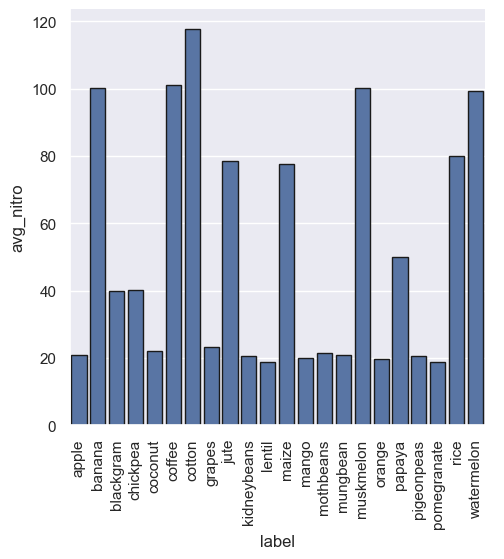

In [12]:
sns.set(rc={'figure.figsize':(8,18)})
sns.catplot(x='label',y='avg_nitro',data=nitrogen,kind='bar',ec='k')
plt.xticks(rotation=90)
plt.show()


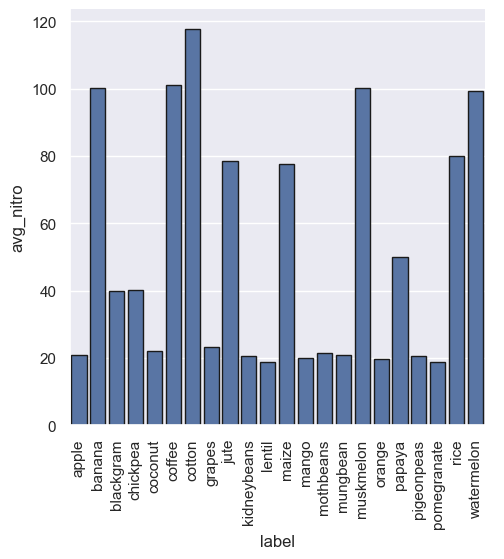

In [13]:
sns.set(rc={'figure.figsize':(8,18)})
sns.catplot(x='label',y='avg_nitro',data=nitrogen,kind='bar',ec='k')
plt.xticks(rotation=90)
plt.show()



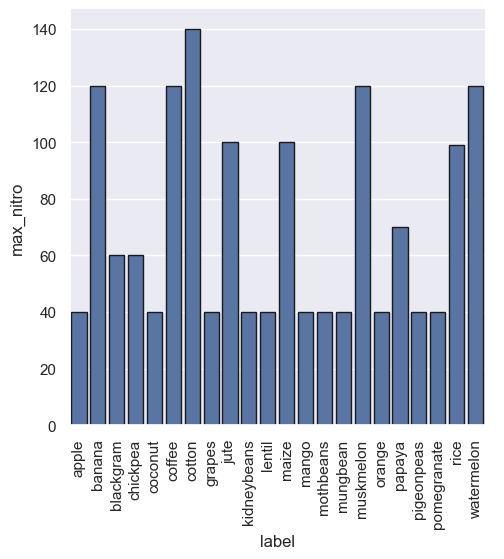

In [14]:
sns.set(rc={'figure.figsize':(8,18)})
sns.catplot(x='label',y='max_nitro',data=nitrogen,kind='bar',ec='k')
plt.xticks(rotation=90)
plt.show()

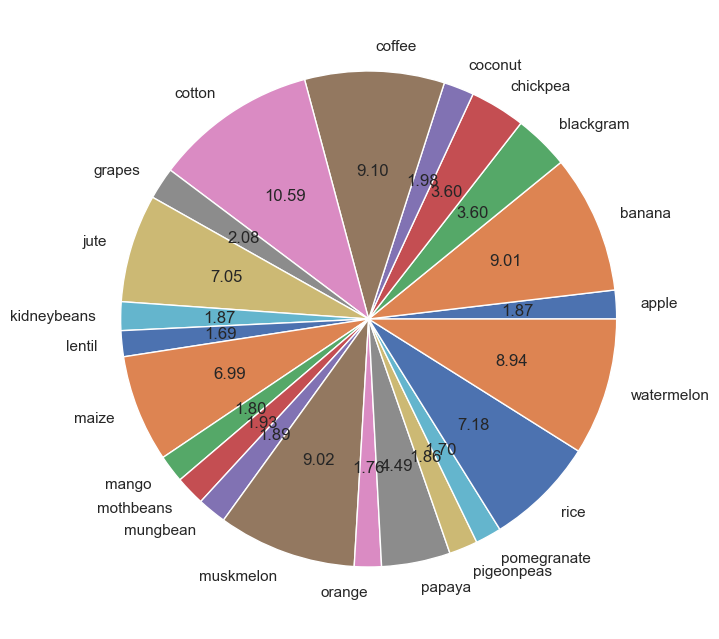

In [15]:
crops_label=list(nitrogen['label'])
avg_nitrogen=list(nitrogen['avg_nitro'])

plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f')
plt.show()

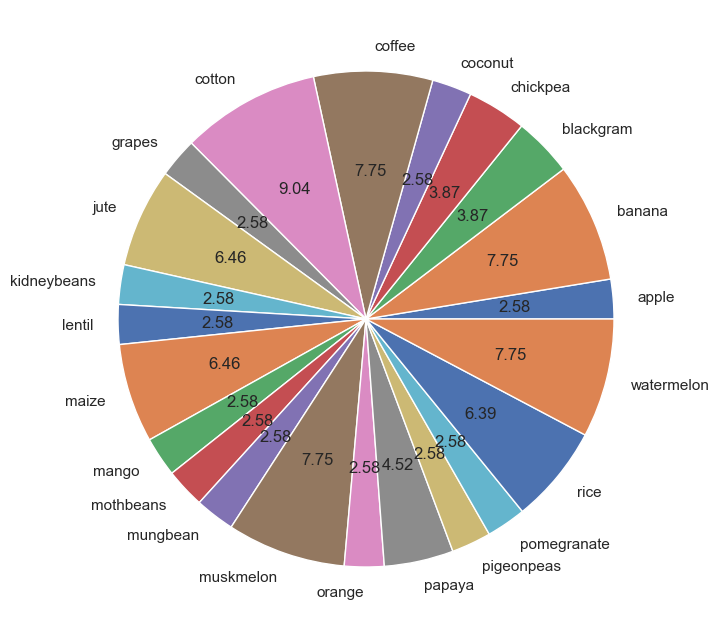

In [16]:
crops_label=list(nitrogen['label'])
max_nitrogen=list(nitrogen['max_nitro'])

plt.pie(max_nitrogen,labels=crops_label,autopct='%2.2f')
plt.show()

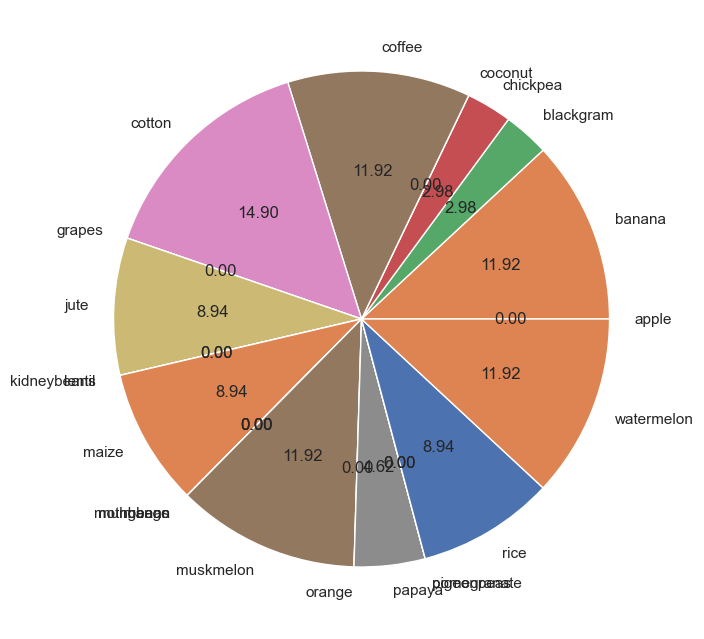

In [17]:
crops_label=list(nitrogen['label'])
min_nitrogen=list(nitrogen['min_nitro'])

plt.pie(min_nitrogen,labels=crops_label,autopct='%2.2f')
plt.show()

In [18]:
temperature=group['temperature'].agg(min_temp='min',max_temp='max',avg_temp='mean')

In [19]:
temperature.reset_index(inplace=True)

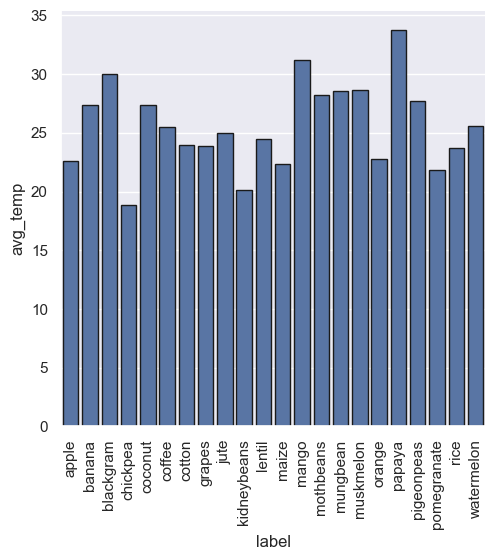

In [20]:
sns.catplot(x='label',y='avg_temp',data=temperature,kind='bar',ec='k')
plt.xticks(rotation=90)
plt.show()


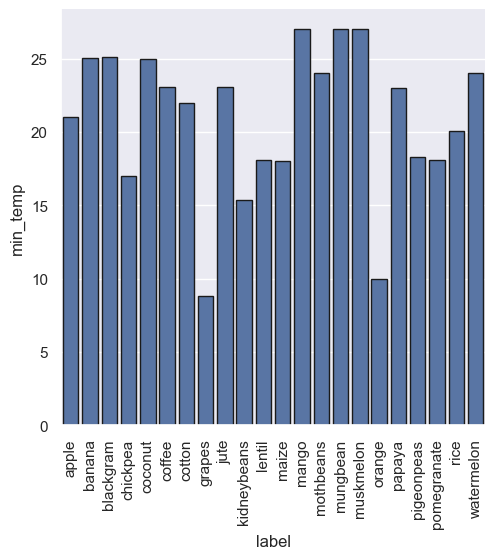

In [21]:

sns.catplot(x='label',y='min_temp',data=temperature,kind='bar',ec='k')
plt.xticks(rotation=90)
plt.show()



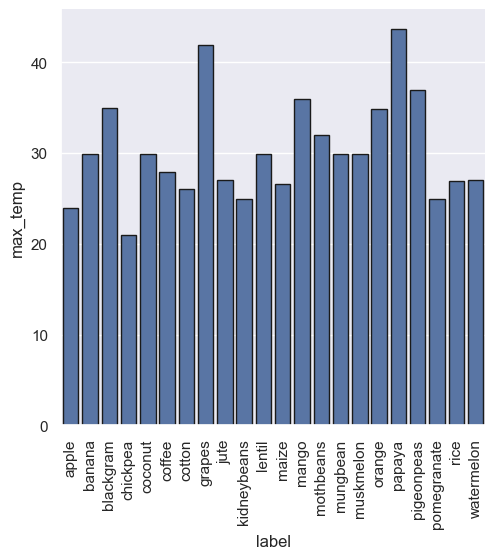

In [22]:

sns.catplot(x='label',y='max_temp',data=temperature,kind='bar',ec='k')
plt.xticks(rotation=90)
plt.show()



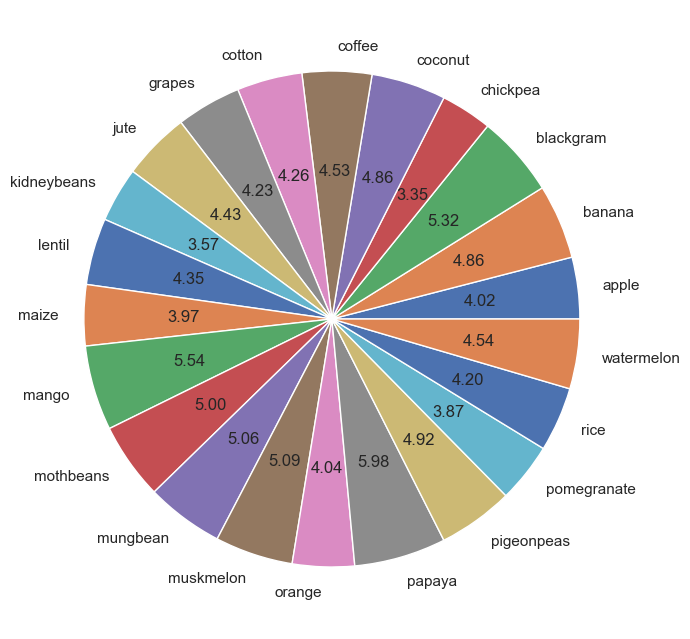

In [23]:
crops_label=list(temperature['label'])
avg_temperature=list(temperature['avg_temp'])

plt.pie(avg_temperature,labels=crops_label,autopct='%2.2f')
plt.show()

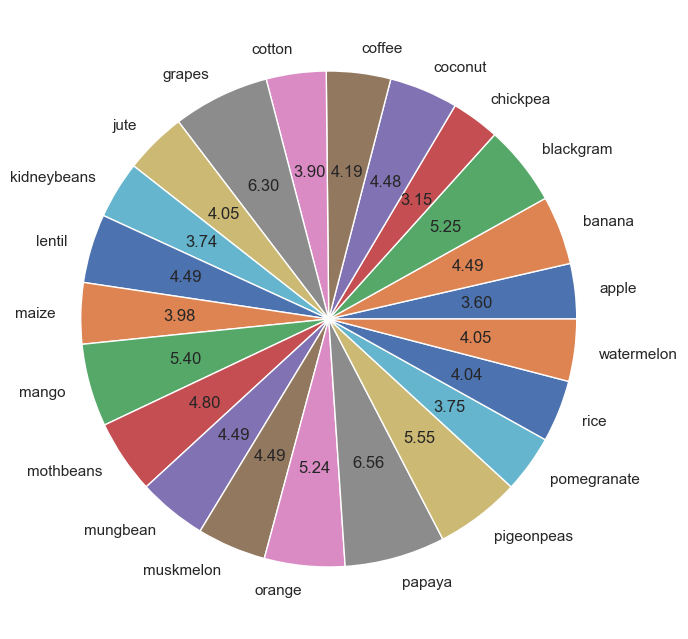

In [24]:
crops_label=list(temperature['label'])
max_temperature=list(temperature['max_temp'])

plt.pie(max_temperature,labels=crops_label,autopct='%2.2f')
plt.show()

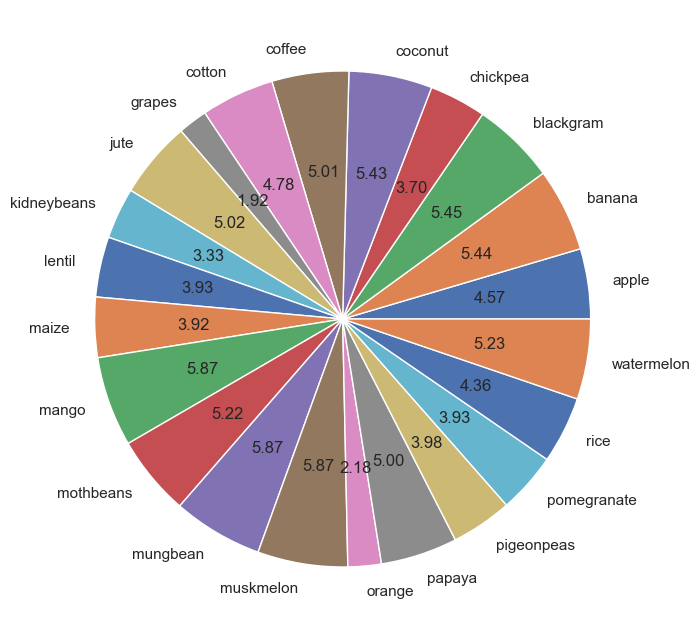

In [25]:
crops_label=list(temperature['label'])
min_temperature=list(temperature['min_temp'])

plt.pie(min_temperature,labels=crops_label,autopct='%2.2f')
plt.show()

In [26]:
### unsupervised learning(X)

x=df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [27]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [28]:
df.duplicated().sum()

0

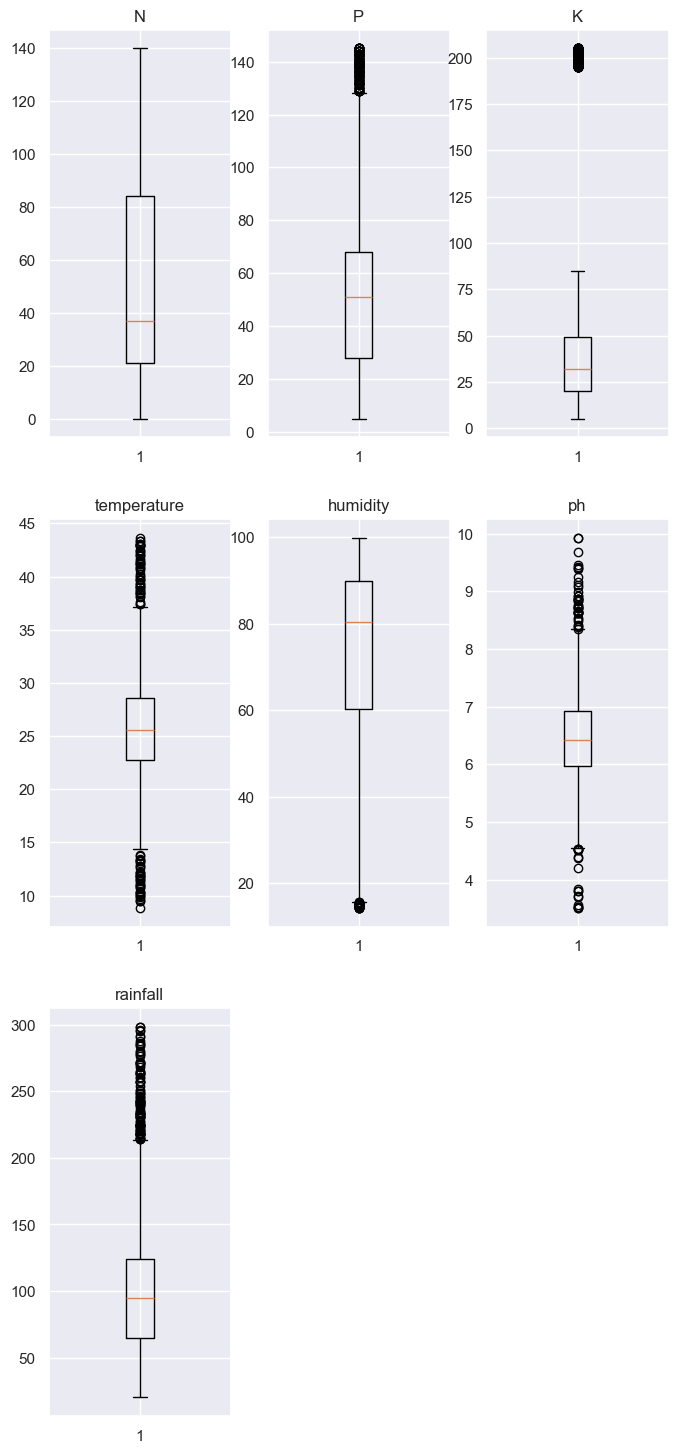

In [29]:
i = 1
for col in x.columns:
    plt.subplot(3,3,i)
    plt.title(col)
    plt.boxplot(x[col])
    i+=1
plt.show()

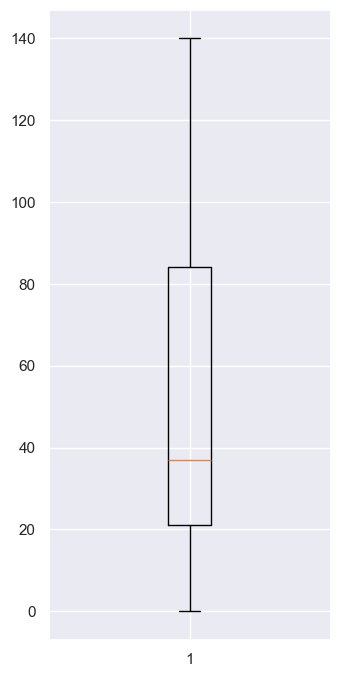

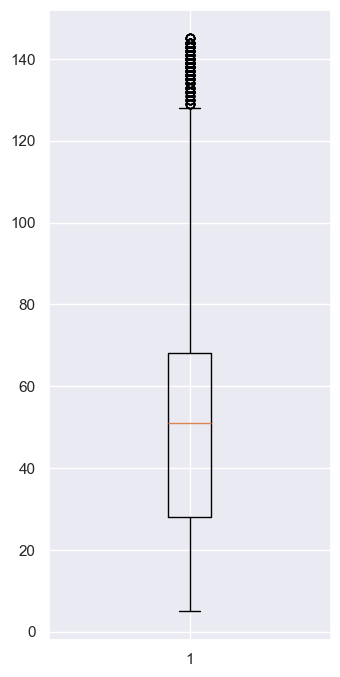

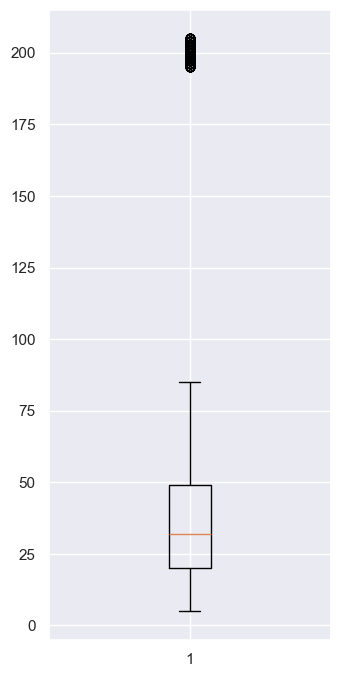

In [30]:
plt.subplot(2,2,1)
plt.boxplot(df['N'])
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df['P'])
plt.show()

plt.subplot(2,2,3)
plt.boxplot(df['K'])
plt.show()

In [31]:
### k means  accuracy normalize
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,Normalizer
std=StandardScaler()
x_transformed=std.fit_transform(x)

In [32]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [33]:
from sklearn.cluster import KMeans
# KMeans()
# euclidein distance method
KMeans = KMeans()
KMeans.fit(x_transformed)



KMeans()

In [34]:

np.unique(KMeans.labels_)


array([0, 1, 2, 3, 4, 5, 6, 7])

In [35]:

df['cluster_no'] = KMeans.labels_
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [36]:
group_6 =df[df['cluster_no']==7]
group_6['label'].unique()

array(['pigeonpeas', 'mothbeans', 'lentil', 'mango'], dtype=object)

In [37]:
import joblib
joblib.dump(KMeans,'kmodel.lb')
joblib.dump(std,'stds.lb')

['stds.lb']

In [38]:

from sklearn.metrics import silhouette_score
silhouette_score(x_transformed,KMeans.labels_)

0.3423374051315477

In [39]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)